In [4]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
%matplotlib notebook

In [6]:
cameras_file = os.path.join("../Desktop/Archive", "speed-camera-locations.csv")
cameras_file = pd.read_csv(cameras_file)
violations_file = os.path.join("../Desktop/Archive","speed-camera-violations.csv")
violations_file = pd.read_csv(violations_file)

In [8]:
speed_cam_locs_df = pd.DataFrame(cameras_file)
speed_cam_locs_df = speed_cam_locs_df.dropna(how ="any")
red_violations_df = pd.DataFrame(violations_file)
red_violations_df = red_violations_df.dropna(how ="any")

In [10]:
speed_cam_locs_df.columns

Index(['ADDRESS', 'FIRST APPROACH', 'SECOND APPROACH', 'GO-LIVE DATE',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'Historical Wards 2003-2015',
       'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'],
      dtype='object')

In [12]:
num_cams = speed_cam_locs_df.groupby("Wards")["ADDRESS"].count()
wards = [1,3,4,7,8,10,13,14,16,17,18,19,20,21,23,24,26,27,29,31,32,33,35,38,39,40,41,42,43,44,45,46,47,48,49,50]

In [14]:
speed_cams = pd.DataFrame({
    "Ward Number" : wards,
    "Speed Cams per Ward": num_cams
})
speed_cams.head()

,Ward Number,Speed Cams per Ward
Wards,,
1,1,2
3,3,3
4,4,4
7,7,1
8,8,2


In [16]:
red_violations_df.columns

Index(['Address', 'Camera ID', 'Date', 'Violations', 'X coordinate',
       'Y coordinate', 'Latitude', 'Longitude', 'Location',
       'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas',
       'Census Tracts', 'Wards'],
      dtype='object')

In [18]:
red_violations_df.head()

,Address,Camera ID,Date,Violations,X coordinate,Y coordinate,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards
0,10318 S INDIANAPOLIS,CHI120,2019-11-21T00:00:00.000,87,1203645.368,1837056.145,41.707577,-87.529848,"{'latitude': '41.70757690291348', 'human_addre...",47.0,21202.0,49.0,705.0,47.0
1,1110 S PULASKI RD,CHI163,2019-11-21T00:00:00.001,7,1149841.166,1894930.809,41.867603,-87.725383,"{'latitude': '41.86760272243294', 'human_addre...",36.0,21572.0,30.0,98.0,14.0
3,11144 S VINCENNES,CHI023,2019-11-21T00:00:00.003,6,1166993.613,1830711.217,41.691025,-87.664248,"{'latitude': '41.69102545584918', 'human_addre...",33.0,22212.0,74.0,378.0,42.0
4,11153 S VINCENNES,CHI022,2019-11-21T00:00:00.004,4,1167028.753,1830593.601,41.690702,-87.664122,"{'latitude': '41.690701951255015', 'human_addr...",45.0,22212.0,74.0,378.0,22.0
5,1117 S PULASKI RD,CHI162,2019-11-21T00:00:00.005,5,1149923.140,1894858.183,41.867402,-87.725084,"{'latitude': '41.867401834997956', 'human_addr...",36.0,21572.0,30.0,98.0,14.0


In [20]:
violations = pd.DataFrame(red_violations_df.groupby("Wards")["Violations"].sum())
merge_df = pd.merge(violations, speed_cams, on="Wards")
merge_df = merge_df[["Ward Number", "Speed Cams per Ward", "Violations"]]
merge_df.head()

,Ward Number,Speed Cams per Ward,Violations
Wards,,,
1.0,1,2,133599
3.0,3,3,76211
4.0,4,4,332224
7.0,7,1,162942
8.0,8,2,112003


In [22]:
cameras_file = os.path.join("../Desktop/Archive", "ward_offices_locs_alt.csv")
ward_offices_df = pd.read_csv(cameras_file)
clean_df = pd.merge(merge_df, ward_offices_df, on="Ward Number")
clean_df.head()

,Ward Number,Speed Cams per Ward,Violations,Latitude,Longitude,Neighborhoods,Navigator
0,1,2,133599,41.918127,-87.687821,"Wicker Park, West Town, Ukranian Village, Loga...","N Side, W and Near W Side"
1,3,3,76211,41.804552,-87.626387,"Hyde Park, Bronzeville, Fuller Park and Grand...",Near S Side
2,4,4,332224,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
3,7,1,162942,41.723191,-87.568378,"Calumet Heights, Pill Hill, South Chicago, Sou...",Far S Side
4,8,2,112003,41.750322,-87.603073,"Pullman, Avalon Park, South Shore, Burnside, C...",Far S Side


In [24]:
def to_linear_regress(x, y, weight, arrangement, cmap):
    pearson_r = round(st.pearsonr(x, y)[0],2)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept, 2)}"
    plt.scatter(x, y, s=weight, c=arrangement, cmap=cmap)
    plt.plot(x,regress_values,"r-")
    print(f"correlation coefficient : {pearson_r}")
    print(f"pvalue: {round(pvalue,2)}")
    return line_eq

In [26]:
def to_annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=13,color="red")

<IPython.core.display.Javascript object>


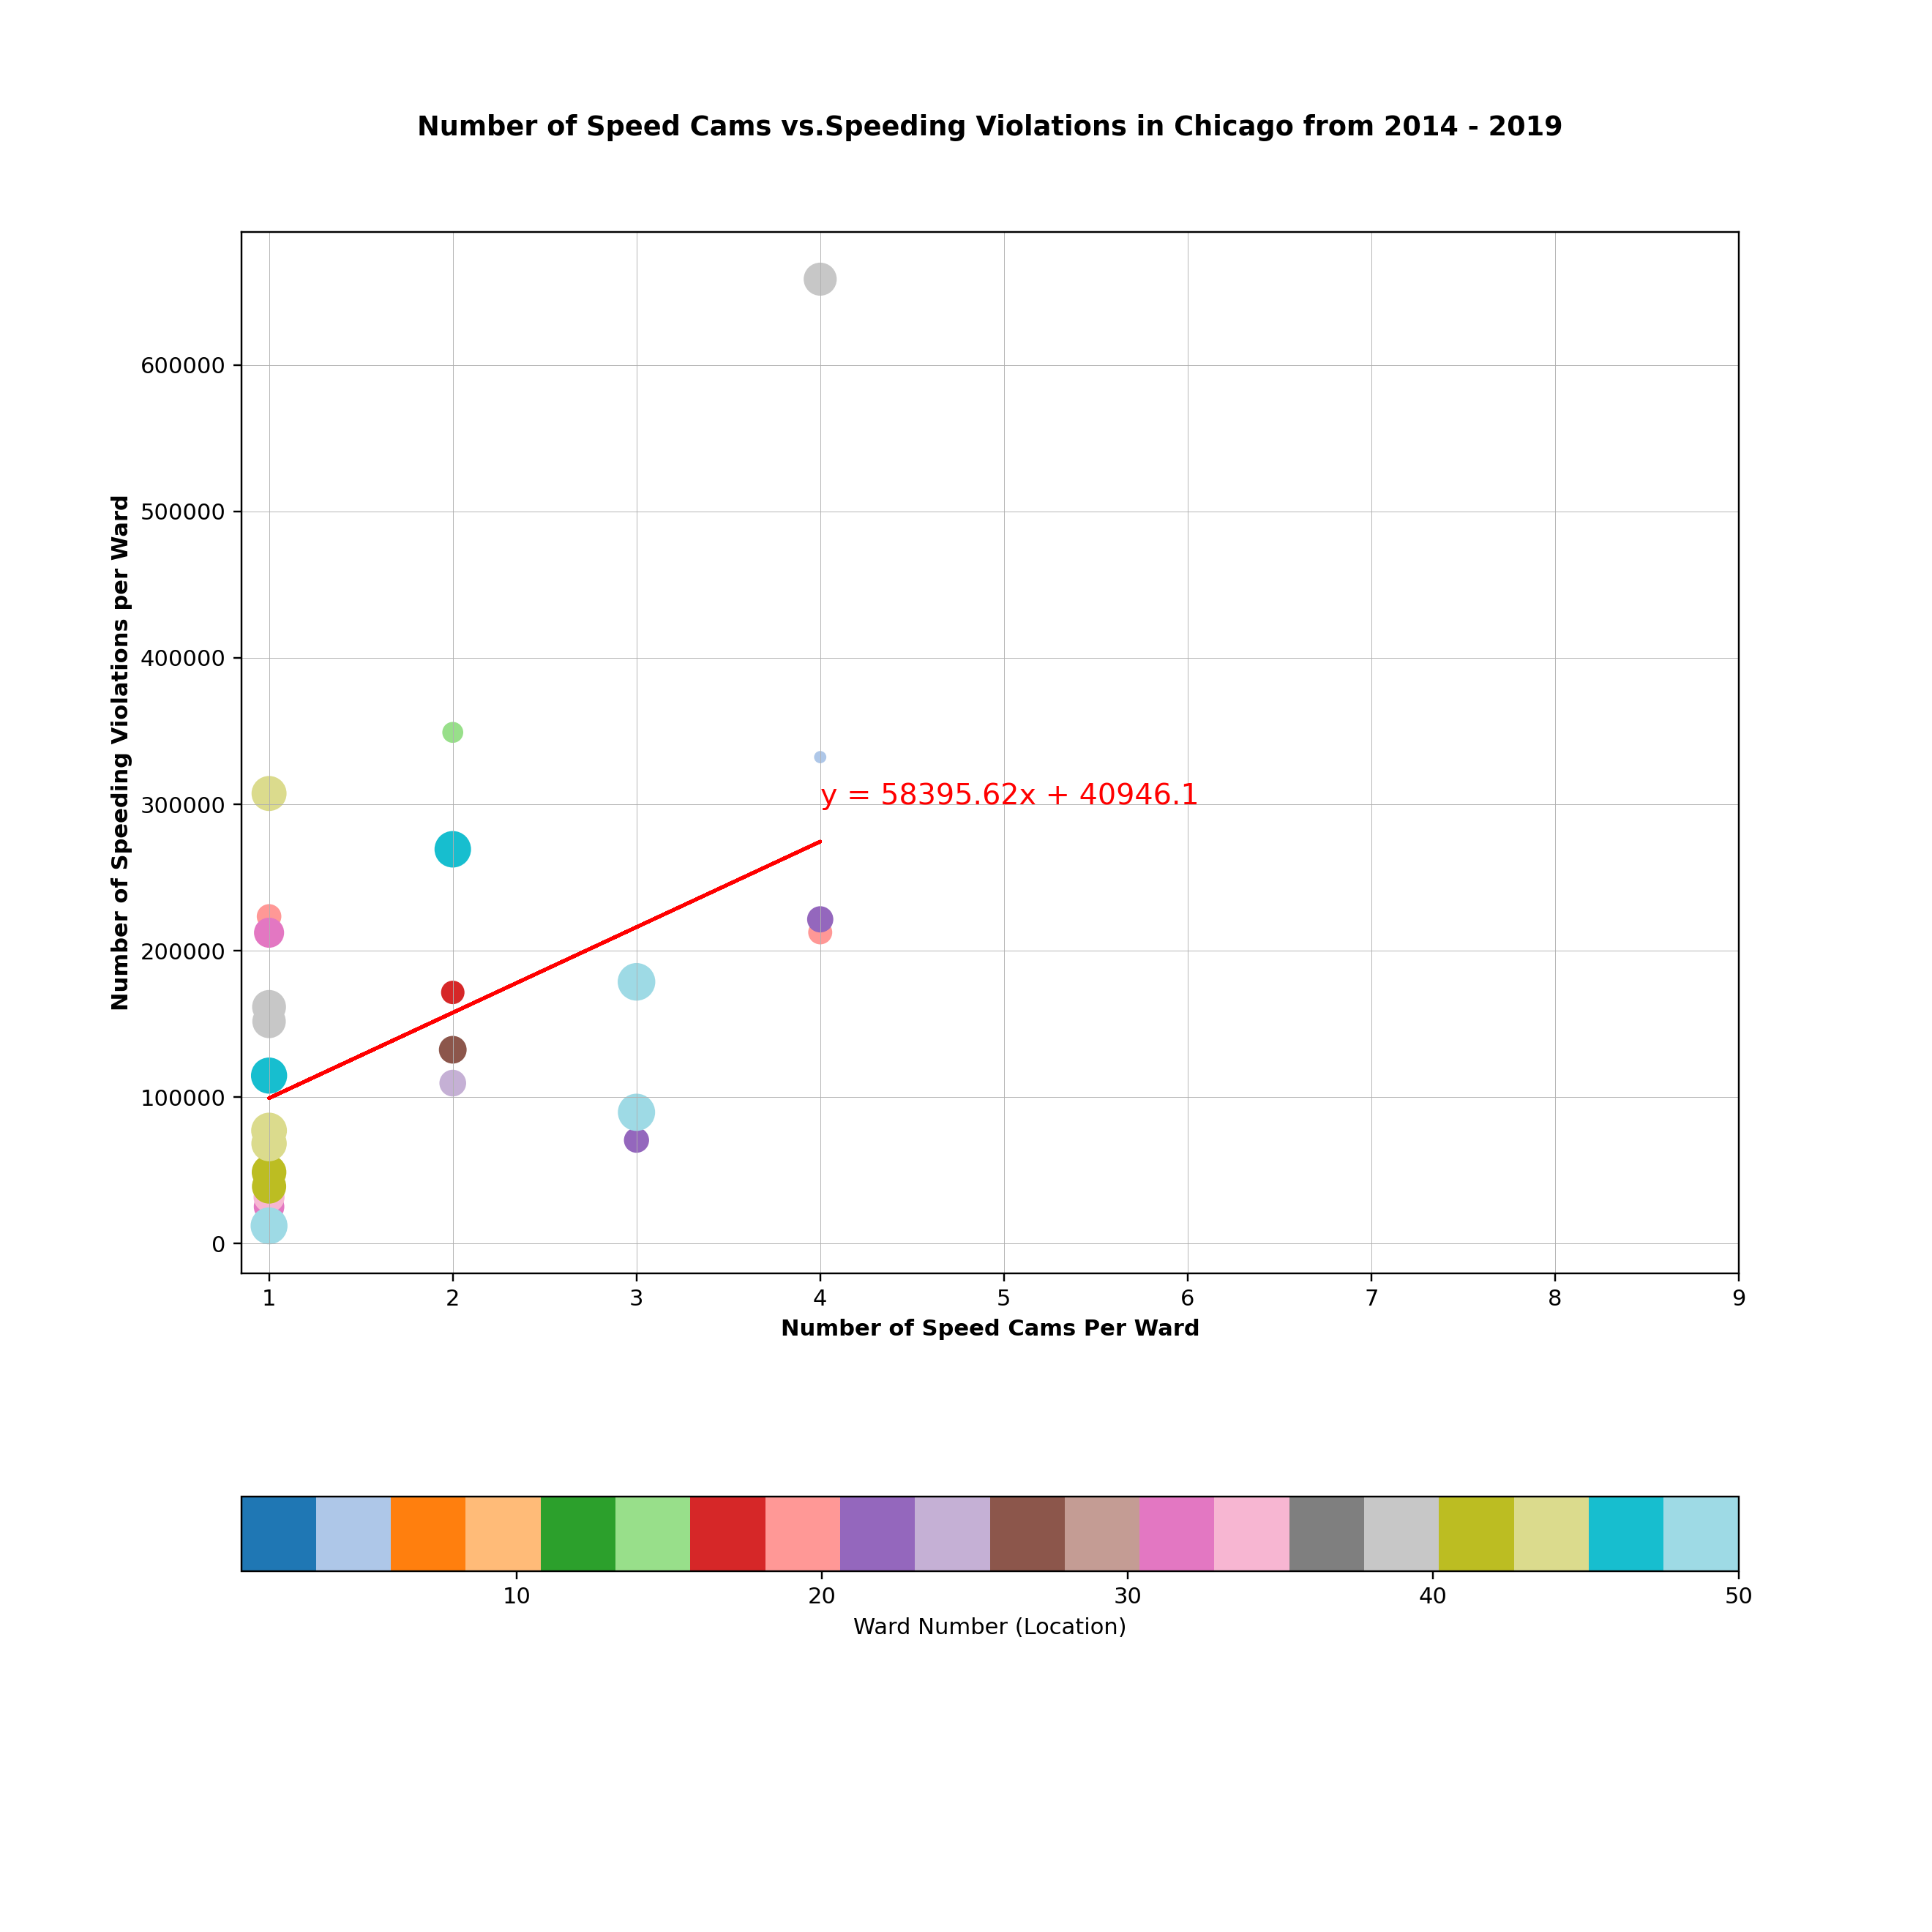

correlation coefficient : 0.5
pvalue: 0.0


In [28]:
weight= clean_df["Ward Number"]*5
arrangement = clean_df["Ward Number"]
np.arange(len(clean_df["Ward Number"]))
cmap='tab20' 
line = to_linear_regress(clean_df["Speed Cams per Ward"], clean_df["Violations"], weight, arrangement, cmap)
to_annotate(line, 4, 300000)
plt.xticks(np.arange(1, 10, 1))
plt.xlabel("Number of Speed Cams Per Ward", fontweight="bold")
plt.ylabel("Number of Speeding Violations per Ward", labelpad=3.5, fontweight="bold") 
plt.title("Number of Speed Cams vs.Speeding Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Ward Number (Location)", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (12,12)
plt.grid(linewidth=0.3)
plt.savefig("Images/speedings.png")

<IPython.core.display.Javascript object>


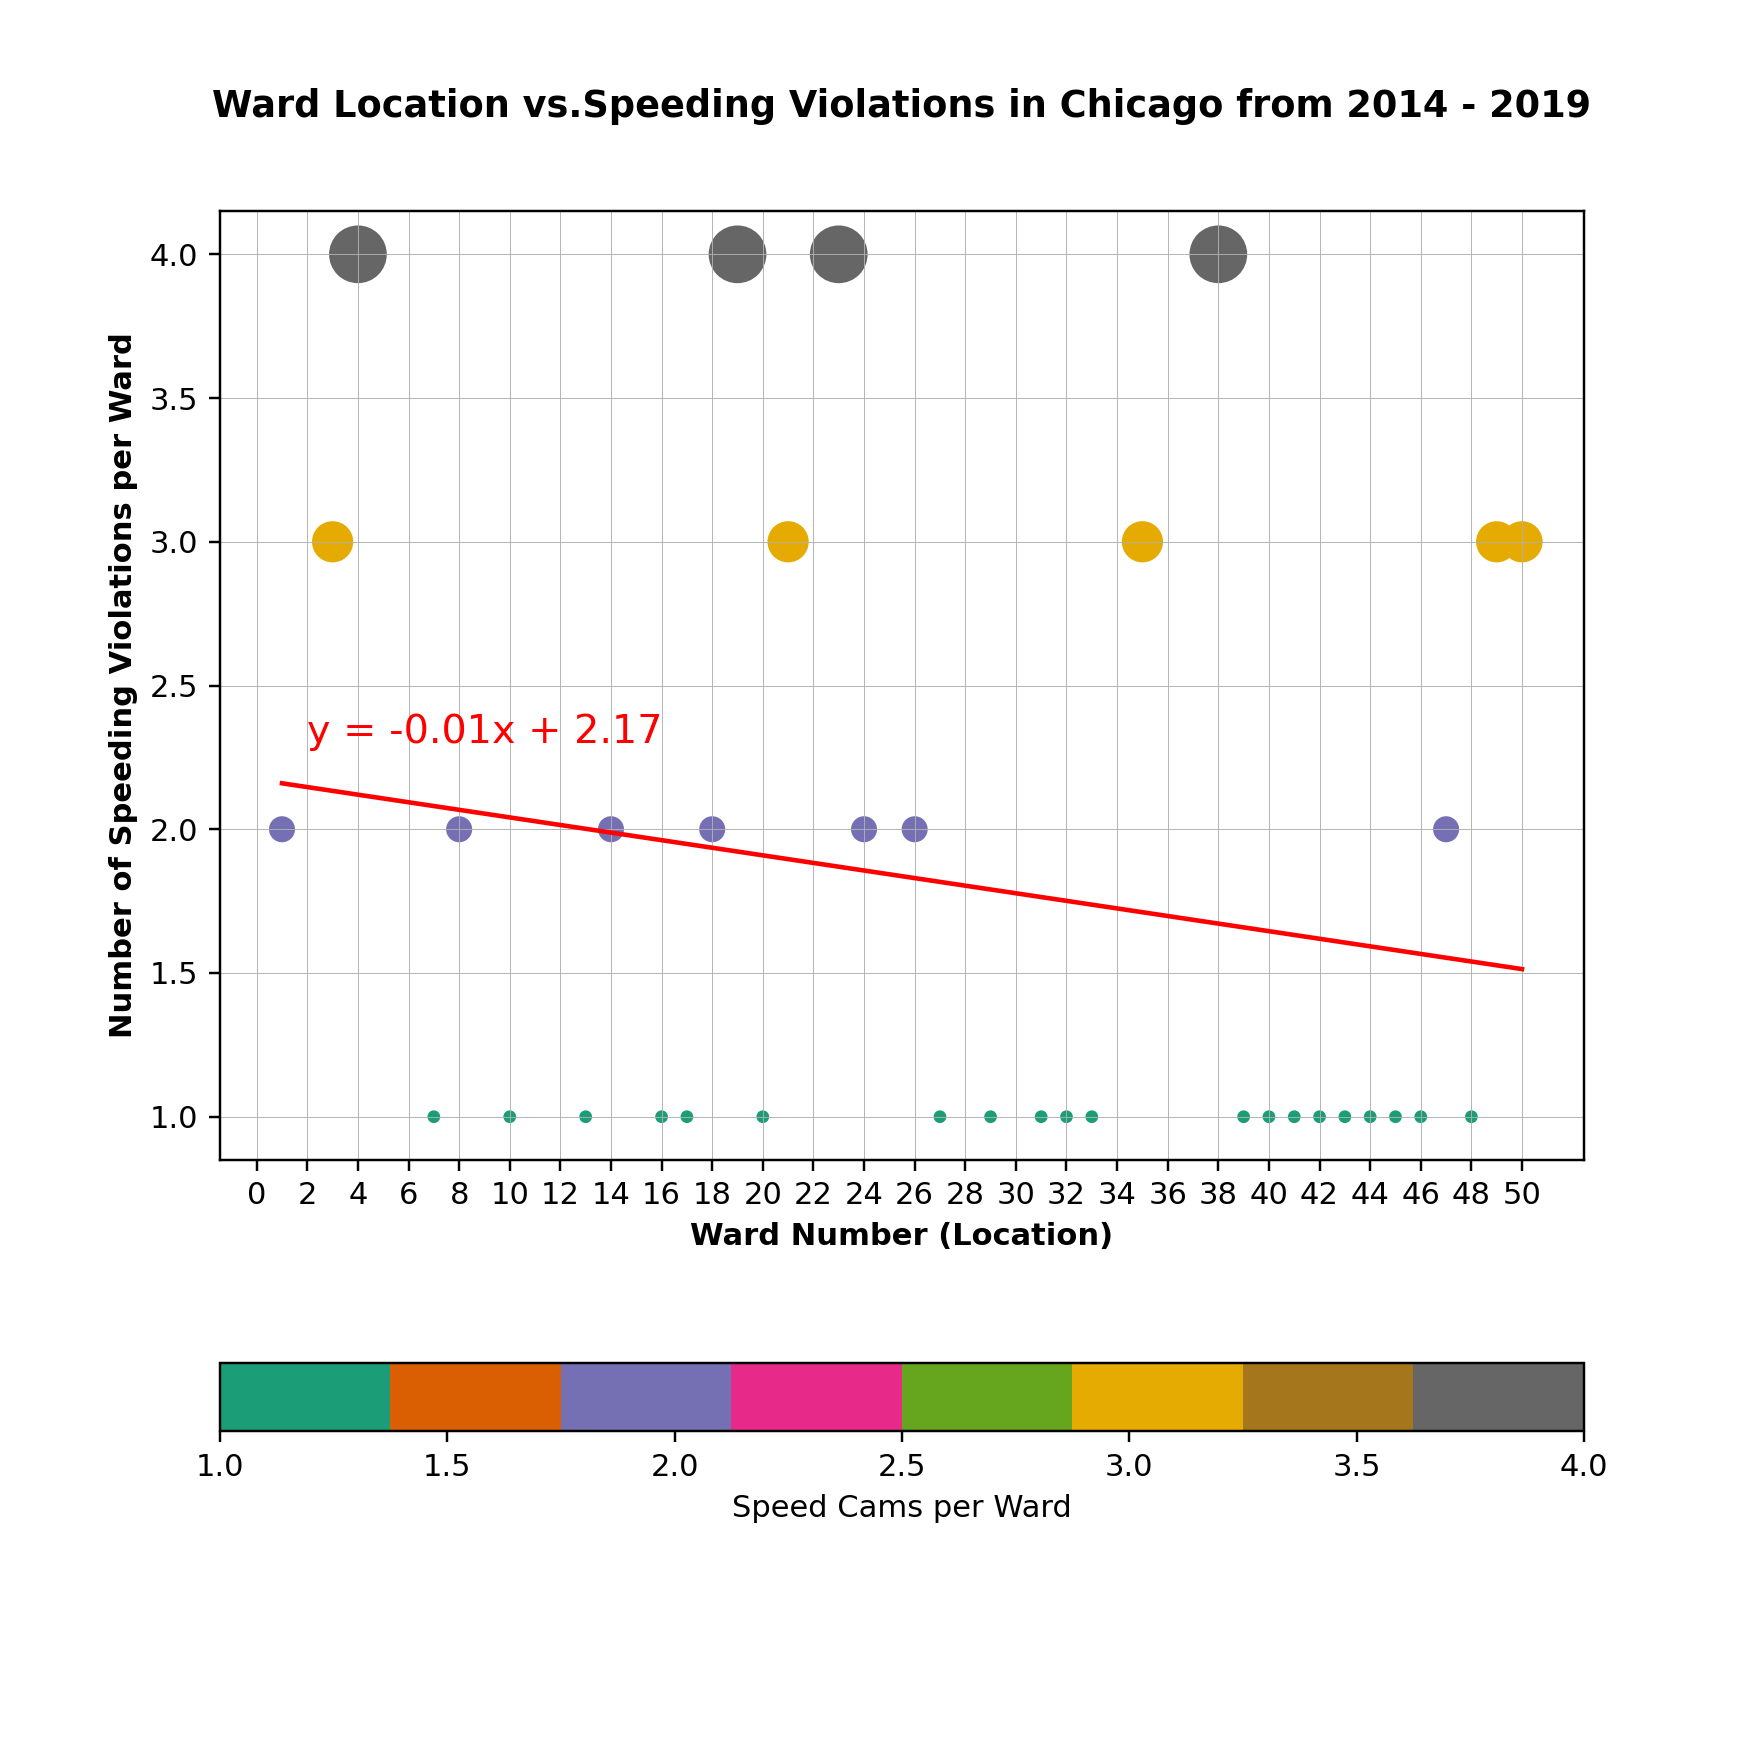

correlation coefficient : -0.18
pvalue: 0.28


In [28]:
weight= 10 * (clean_df["Speed Cams per Ward"]**2.5)
arrangement = clean_df["Speed Cams per Ward"]
cmap='Dark2'
line = to_linear_regress(clean_df["Ward Number"], clean_df["Speed Cams per Ward"], weight, arrangement, cmap)
to_annotate(line, 2, 2.3)
plt.xticks(np.arange(0,51,2))
plt.xlabel("Ward Number (Location)", fontweight = "bold")
plt.ylabel("Number of Speeding Violations per Ward", fontweight="bold")
plt.title("Ward Location vs.Speeding Violations in Chicago from 2014 - 2019", y=1.08, fontweight="bold")
plt.colorbar(label="Speed Cams per Ward", orientation="horizontal") 
plt.rcParams["figure.figsize"] = (8,8)
plt.grid(linewidth = 0.3)
plt.savefig("Images/ward number vs. speedings.png")

In [30]:
clean_df.sort_values(by="Violations",ascending=False).reset_index(drop=True)

,Ward Number,Speed Cams per Ward,Violations,Latitude,Longitude,Neighborhoods,Navigator
0,38,4,658608,41.951554,-87.806574,"Portage Park, Dunning",NW Side
1,14,2,349109,41.803364,-87.690833,"Far West Side, Archer Heights, Garfield Ridge,...",SW Side
2,4,4,332224,41.885555,-87.631870,"South Loop, Museum Campus, Douglas, Grand Boul...",S Side
3,43,1,307390,41.929152,-87.648155,"Lincoln Park, Old Town",N Side
4,47,2,269291,41.960580,-87.682545,"North Center, Roscoe Village, Lincoln Square, ...","Far N. Side, N. Side"
5,20,1,223435,41.791594,-87.630251,"Back of the Yards, Canaryville, Washington Par...",S and SW Side
6,23,4,221455,41.794699,-87.775670,"West Elsdon, West Lawn, Garfield Ridge and Cle...",Far W Side and SW Side
7,19,4,212561,41.705995,-87.682192,"Beverly, Mount Greenwood, Morgan Park, Washing...",Far SW Side
8,31,1,212307,41.932807,-87.742242,"Hermosa, Belmont-Cragin, Logan Square",NW Side
9,50,3,178772,41.998445,-87.703388,"West Ridge, West Roger's Park",Far N. Side
